<div style="background-color: yellow; padding: 18px;">
    <h1> Data Science Challenge |  Data & Analytics Team
</div>

<div style="background-color: lightblue; padding: 10px;">
    <h2> Case 1 - Explorar las ofertas relámpago, ¿qué insights puedes generar?
</div>

**Descripción**
 
En conjunto con el desafío te compartimos un archivo llamado `ofertas_relampago.csv` el cual posee información de los resultados de ofertas del tipo relampago para un periodo de tiempo y un país determinado.

[Estas ofertas](https://www.mercadolibre.com.mx/ofertas?promotion_type=lightning&container_id=MLM779363-1#origin=scut&filter_applied=promotion_type&filter_position=2&is_recommended_domain=false) en mercadolibre se pueden ver de la siguiente manera:
    
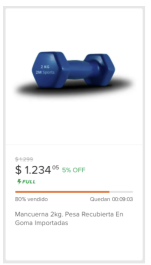

   
Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.
    
  
El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.
    
Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.
___

## Estratégia para a Análise Exploratória de Dados:

- Compreender o problema
- Entender os dados (carregar, verificar estrutura dos dados, tipos de variáveis, valores ausentes)
- Exploração incial (estatística descritiva básica univariada, ver distribuição de variáveis, plotar gráficos, tratar dados ausentes)
- Análise bivariada (relação entre variáveis, gráficos de dispersão e barras)
- Analisar Outliers
- Agrupar, manipular dados, gerar gráficos explicativos e tirar insights (refinar análise)
- Resumir e concluir

 ### Contexto do problema
 
 Com informações sobre os resultados de ofertas relâmpago do Meli em um período de um site, o objetivo deste desafio é realizar uma Análise Exploratória de Dados (EDA) sobre esses dados, buscando insights sobre esse tipo de oferta.
 
 Os itens (produtos) entram em promoção por um período e a ideia inicial é saber como foi a oferta, quais produtos venderam mais, quais geraram valores maiores, a que domínio e vertical pertencem.

### Entender os dados

In [3]:
# Importar bibliotecas e carregar os dados

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Carregar o arquivo (base de dados)
df = pd.read_csv('ofertas_relampago.csv')

In [11]:
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


Entendendo um pouco sobre as variáveis disponíveis

- OFFER_START_DATE: Data de início da oferta.
- OFFER_START_DTTM: Data e hora de início da oferta.
- OFFER_FINISH_DTTM: Data e hora de finalização da oferta.
- OFFER_TYPE: Tipo de oferta.
- INVOLVED_STOCK: Estoque envolvido na oferta.
- REMAINING_STOCK_AFTER_END: Estoque restante após o término da oferta.
- SOLD_AMOUNT: Valor total vendido.
- SOLD_QUANTITY: Quantidade total vendida.
- ORIGIN: Origem da oferta.
- SHIPPING_PAYMENT_TYPE: Tipo de pagamento de envio.
- DOM_DOMAIN_AGG1: Primeiro nível de agregação a qual o item (produto) pertence.
- VERTICAL: Vertical do produto.
- DOMAIN_ID: Domínio que o item pertence

In [56]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

Existem dados numéricos, categóricos e tipo data (que será transformado em timestamp/datetime). 

Existem dados faltantes, que irá ser explorado:

In [19]:
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [24]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() /
           df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Porcentagem'])
missing_data.head()

,Total,Porcentagem
ORIGIN,37430,0.767858
SOLD_AMOUNT,24167,0.495774
SOLD_QUANTITY,24167,0.495774
OFFER_START_DATE,0,0.000000
OFFER_START_DTTM,0,0.000000


Com 76,8% dos dados faltantes, ORIGIN é uma feature que é candidata a ser eliminada.
Total vendido também possui valores ausentes e será tratado posteriormente

In [25]:
df.shape

(48746, 13)

### Exploração inicial

In [28]:
# Algumas estatísticas univariadas básicas das colunas numéricas

df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


INVOLVED_STOCK e REMAINING_STOCK_AFTER_END provavelmente possuem valores atípicos pois sua média e mediana estão distantes

In [29]:
# Análise rápida para dados categóricos

df.describe(include='O')

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
count,48746,48746,48746,48746,11316,48746,48746,48746,48746
unique,61,783,7578,1,1,2,36,9,1266
top,2021-07-30,2021-07-30 13:00:00+00:00,2021-07-06 13:00:01+00:00,lightning_deal,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,1300,414,77,48746,11316,26658,6742,13241,1759


OFFER_TYPE possui apenas 1 valor (lightning_deal) e pode ser eliminada pois não agrega informação.
O ORIGIN deve ser analisado pois, apesar de possuir apenas 1 valor único, tem valores faltantes e talvez possa ser uma categoria a mais.

In [57]:
# Todas as ofertas foram do tipo lightning_deal

df.drop(columns=['OFFER_TYPE'], inplace=True)

**Olhando as datas**

In [32]:
print(f'As ofertas aconteceram de {df.OFFER_START_DATE.min()} a {df.OFFER_START_DATE.max()}')

As ofertas aconteceram de 2021-06-01 a 2021-07-31


In [35]:
# Transformando as colunas de data em datetime

for coluna_data in ['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']:
    df[coluna_data] = pd.to_datetime(df[coluna_data])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]     
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   INVOLVED_STOCK             48746 non-null  int64              
 4   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 5   SOLD_AMOUNT                24579 non-null  float64            
 6   SOLD_QUANTITY              24579 non-null  float64            
 7   ORIGIN                     11316 non-null  object             
 8   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 9   DOM_DOMAIN_AGG1            48746 non-null  object             
 10  VERTICAL                   48746 non-null  object             
 11  DO

In [48]:
# Criar a coluna de duração da oferta:

df['OFFER_DURATION'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']
df['OFFER_DURATION_HOURS'] = (df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600

In [52]:
# Em média a oferta dura quase 6 horas
df['OFFER_DURATION_HOURS'].mean()

5.7083444168638335

In [53]:
df['OFFER_DURATION_HOURS'].median()

6.000555555555556

In [55]:
# Existem durações de 4 dias (104 horas) mas existem durações instantâneas (o que não é possível) - investigar

df['OFFER_DURATION_HOURS'].sort_values()

35046      0.000000
3479       0.000000
44729      0.000000
40662      0.000000
35302      0.000000
            ...    
28519     14.619722
28540     14.629722
28556     14.668611
28642     15.619167
42018    104.752500
Name: OFFER_DURATION_HOURS, Length: 48746, dtype: float64

Existem durações de 4 dias (104 horas) mas existem durações instantâneas (o que não é possível) - investigar

In [60]:
# Feature origin:

df.ORIGIN.value_counts(dropna=False)

ORIGIN
NaN    37430
A      11316
Name: count, dtype: int64

In [61]:
df.ORIGIN.value_counts(dropna=False, normalize=True)

ORIGIN
NaN    0.767858
A      0.232142
Name: proportion, dtype: float64

A origem da oferta não parece trazer informação isoladamente. Essa feature será retirada do conjunto de dados

In [62]:
df.drop(columns=['ORIGIN'], inplace=True)

In [64]:
# SHIPPING_PAYMENT_TYPE: tipo do pagamento de envio

df.SHIPPING_PAYMENT_TYPE.value_counts(dropna=False)

SHIPPING_PAYMENT_TYPE
free_shipping    26658
none             22088
Name: count, dtype: int64

In [66]:
df.SHIPPING_PAYMENT_TYPE.value_counts(dropna=False, normalize=True)

SHIPPING_PAYMENT_TYPE
free_shipping    0.546876
none             0.453124
Name: proportion, dtype: float64

Como 54% das ofertas tiveram envio gratuito (free_shipping), imagina-se que os demais tiveram um valor de frete, ou seja, não foram sem custo. Por isso, valores faltantes serão substituidos pela categoria `paid_shipping`